# IE0005 Project by Group 6

## Initialization
Dataset used: Cardio...

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
print(f"{np.__version__}\n{pd.__version__}\n{sb.__version__}")

2.1.2
2.2.3
0.13.2


In [2]:
cardioData = pd.read_csv("cardio_train.csv", delimiter=";")

Html code to align table to the left

In [3]:
%%html
<style>
table {float:left}
</style>

### Data Description
from https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data
| Column | Feature | ColumnName | dtype/description |
| ------ | ------- | ----------- | ---------- |
Age | Objective Feature | age | int (days) |
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | | binary |

In [4]:
cardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Cleaning the Data Set

In [5]:
#Removing the redundant column 'id'
cardioData = cardioData.drop('id',axis=1)
cardioData.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Original size of dataset
cardioData.shape

(70000, 12)

In [7]:
#Drop all duplicates while keeping same structure
cardioData.drop_duplicates(inplace=True)
#Changed size of dataset
cardioData.shape

(69976, 12)

70000 - 69976 = 24 Duplicate rows

In [8]:
#Count all null values in dataset
cardioData.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No null values

In [9]:
#Original dtypes of columns
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [10]:
#Change all incorrect dtypes to its correct dtype
cardioData = cardioData.astype({'smoke': 'bool',
                                'alco':'bool',
                                'active':'bool',
                                'cardio':'bool',
                                'gluc':'category',
                                'cholesterol':'category',
                                'gender':'category'
                               })
#Changed dtypes
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          69976 non-null  int64   
 1   gender       69976 non-null  category
 2   height       69976 non-null  int64   
 3   weight       69976 non-null  float64 
 4   ap_hi        69976 non-null  int64   
 5   ap_lo        69976 non-null  int64   
 6   cholesterol  69976 non-null  category
 7   gluc         69976 non-null  category
 8   smoke        69976 non-null  bool    
 9   alco         69976 non-null  bool    
 10  active       69976 non-null  bool    
 11  cardio       69976 non-null  bool    
dtypes: bool(4), category(3), float64(1), int64(4)
memory usage: 3.7 MB


In [11]:
#Checking of minmax values of every numerical
print(f'Max Age = {cardioData.age.max()} days or approx. {cardioData.age.max()//365} years')
print(f'Min Age = {cardioData.age.min()} days or approx. {cardioData.age.min()//365} years')
print()
print(f'Max Height = {cardioData.height.max()} cm')
print(f'Min Height = {cardioData.height.min()} cm')
print()
print(f'Max Weight = {cardioData.weight.max()} kg')
print(f'Min Weight = {cardioData.weight.min()} kg')
print()
print(f'Max SBP = {cardioData.ap_hi.max()}')
print(f'Min SBP = {cardioData.ap_hi.min()}')
print()
print(f'Max DBP = {cardioData.ap_lo.max()}')
print(f'Min DBP = {cardioData.ap_lo.min()}')

Max Age = 23713 days or approx. 64 years
Min Age = 10798 days or approx. 29 years

Max Height = 250 cm
Min Height = 55 cm

Max Weight = 200.0 kg
Min Weight = 10.0 kg

Max SBP = 16020
Min SBP = -150

Max DBP = 11000
Min DBP = -70


Height min and max values are unrealistic (~130cm < Female < ~200cm, ~140cm < Male < ~210cm)

Weight min and max values are unrealistic (~40kg < Female < ~100kg, ~40kg < Male < ~120kg)

SBP min and max values are unrealistic (180 < SBP < 70)

DBP min and max values are unrealistic (100 < DBP < 40)

In [12]:
# Only keep all BP values where Systolic > Diastolic (DBP > SBP is not possible in real life)
cleanedData = cardioData[cardioData.ap_hi>cardioData.ap_lo] 

# Remove unrealistic values/outliers (alpha == 0.01, two-tailed)
intCol = ['height','weight','ap_hi','ap_lo']
for col in intCol:
    q_low = cleanedData[col].quantile(0.005)
    q_hi  = cleanedData[col].quantile(0.995)
    cleanedData = cleanedData[(cleanedData[col] < q_hi) & (cleanedData[col] > q_low)]

print(f"Cleaned size of dataset = {cleanedData.shape}")
print()
print(f'Max Height = {cleanedData.height.max()} cm')
print(f'Min Height = {cleanedData.height.min()} cm')
print()
print(f'Max Weight = {cleanedData.weight.max()} kg')
print(f'Min Weight = {cleanedData.weight.min()} kg')
print()
print(f'Max SBP = {cleanedData.ap_hi.max()}')
print(f'Min SBP = {cleanedData.ap_hi.min()}')
print()
print(f'Max DBP = {cleanedData.ap_lo.max()}')
print(f'Min DBP = {cleanedData.ap_lo.min()}')

Cleaned size of dataset = (63121, 12)

Max Height = 185 cm
Min Height = 145 cm

Max Weight = 124.0 kg
Min Weight = 46.0 kg

Max SBP = 179
Min SBP = 93

Max DBP = 109
Min DBP = 61


## Exploratory Data Analysis

In [13]:
cleanedData.describe()

,age,height,weight,ap_hi,ap_lo
count,63121.000000,63121.000000,63121.000000,63121.000000,63121.000000
mean,19499.706120,164.525483,74.080374,126.724276,81.809873
std,2455.569304,7.472566,13.190444,14.300595,7.710279
min,10859.000000,145.000000,46.000000,93.000000,61.000000
25%,17742.000000,159.000000,65.000000,120.000000,80.000000
50%,19721.000000,165.000000,72.000000,120.000000,80.000000
75%,21346.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,185.000000,124.000000,179.000000,109.000000


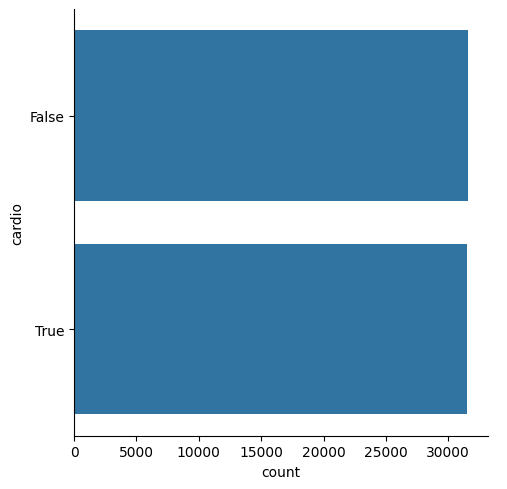

In [14]:
# Count Plot for presence or absence of cardiovascular disease
sb.catplot(y = "cardio", data = cleanedData, kind = "count")

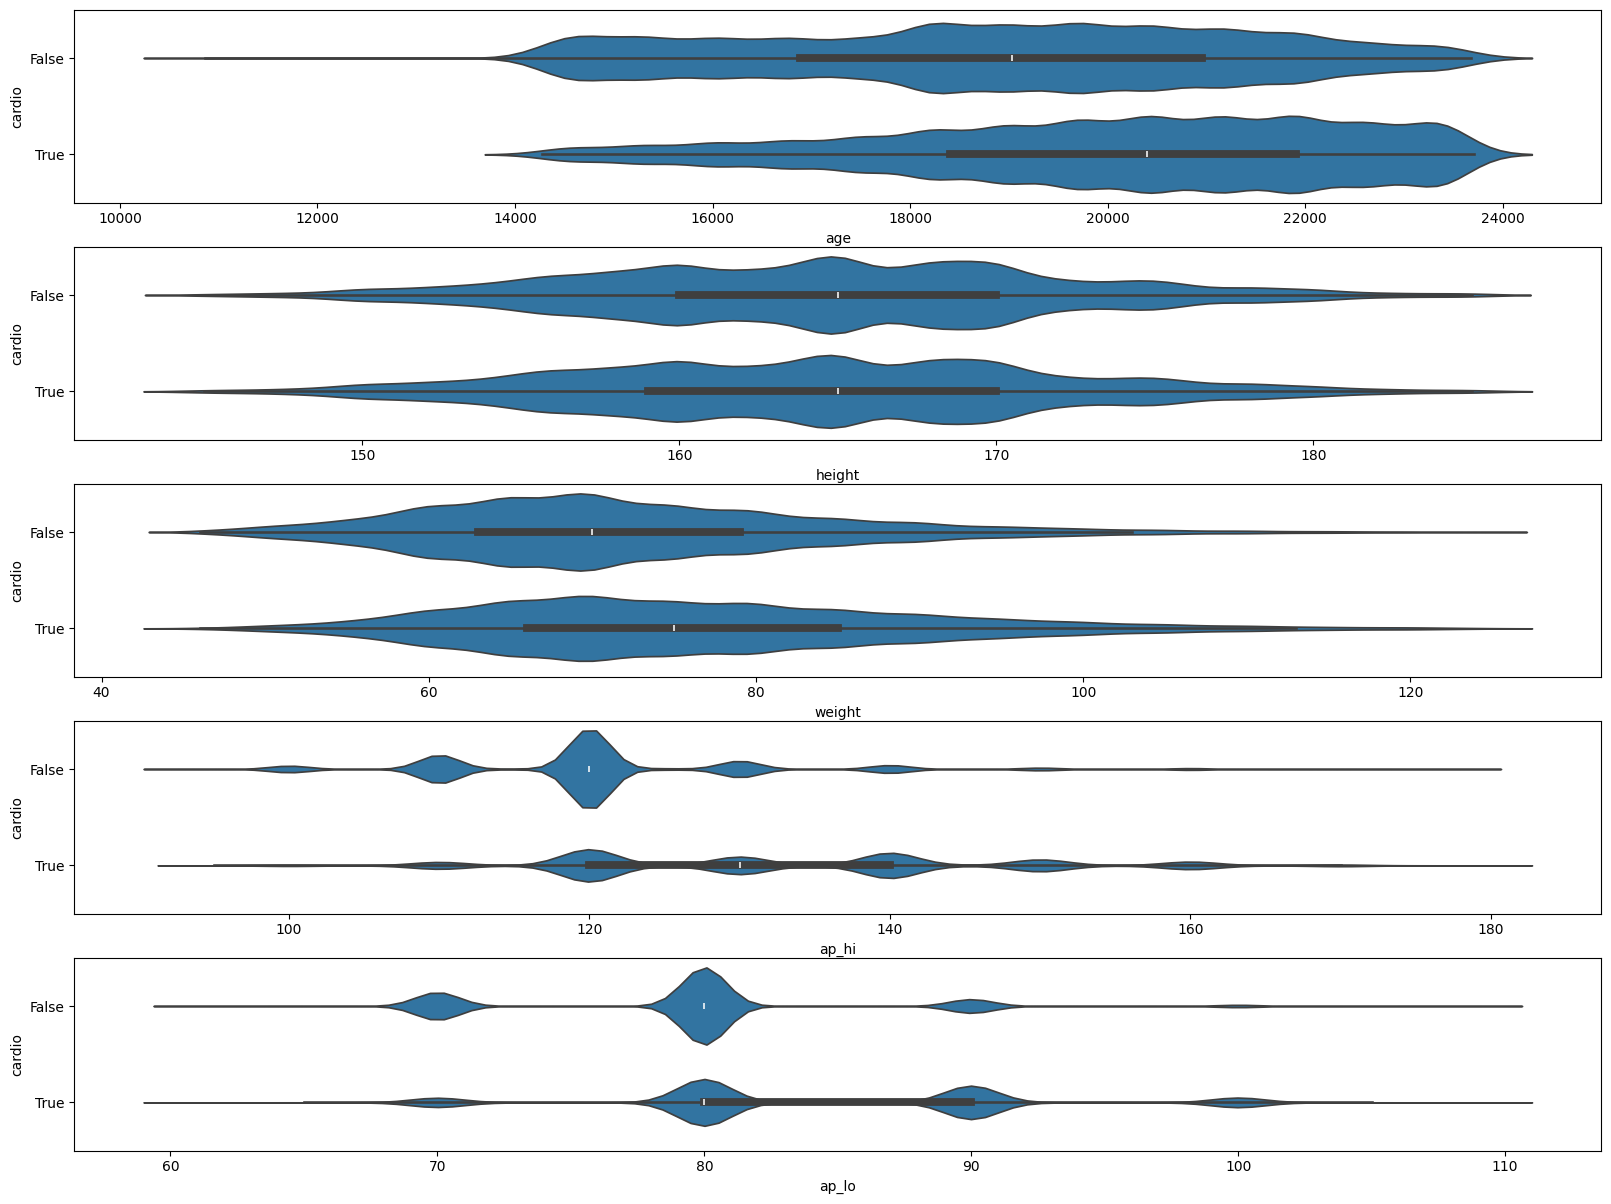

In [15]:
f, axes = plt.subplots(5, 1, figsize=(16, 12))
f.tight_layout()

numeric_data = pd.DataFrame(cleanedData.select_dtypes(include=[float, int]))
count = 0
for var in numeric_data:
    sb.violinplot(x = var, y = "cardio", data = cleanedData[[var,'cardio']], orient = "h", ax=axes[count])
    count += 1

In [16]:
cleanedData.groupby(['smoke','alco','active','cardio']).count()

age  gender  height  weight  ap_hi  ap_lo  \
smoke alco  active cardio                                                
False False False  False    5193    5193    5193    5193   5193   5193   
                   True     6025    6025    6025    6025   6025   6025   
            True   False   22674   22674   22674   22674  22674  22674   
                   True    22037   22037   22037   22037  22037  22037   
      True  False  False     126     126     126     126    126    126   
                   True      136     136     136     136    136    136   
            True   False     693     693     693     693    693    693   
                   True      732     732     732     732    732    732   
True  False False  False     294     294     294     294    294    294   
                   True      361     361     361     361    361    361   
            True   False    1707    1707    1707    1707   1707   1707   
                   True     1488    1488    1488    1488   1488   1488   
      True  False  False     112     112     112     112    112    112   
                   True      137     137     137     137    137    137   
            True   False     822     822     822     822    822    822   
                   True      584     584     584     584    584    584   

                           cholesterol   gluc  
smoke alco  active cardio                      
False False False  False          5193   5193  
                   True           6025   6025  
            True   False         22674  22674  
                   True          22037  22037  
      True  False  False           126    126  
                   True            136    136  
            True   False           693    693  
                   True            732    732  
True  False False  False           294    294  
                   True            361    361  
            True   False          1707   1707  
                   True           1488   1488  
      True  False  False           112    112  
                   True            137    137  
            True   False           822    822  
                   True            584    584

Largest Subset:\
70.8% (44,711) of the dataset is the subset of people who do not **smoke**, do not drink **alcohol** and are **active**\
Within this subset, the number of people with cardiovascular diseases = 22,037 (49.3%)

Next Largest Subset:\
17.8% (11,218) of the dataset is the subset of people who do not **smoke**, do not drink **alcohol** and are **not active**\
Within this subset, the number of people with cardiovascular diseases = 6025 (53.7%)

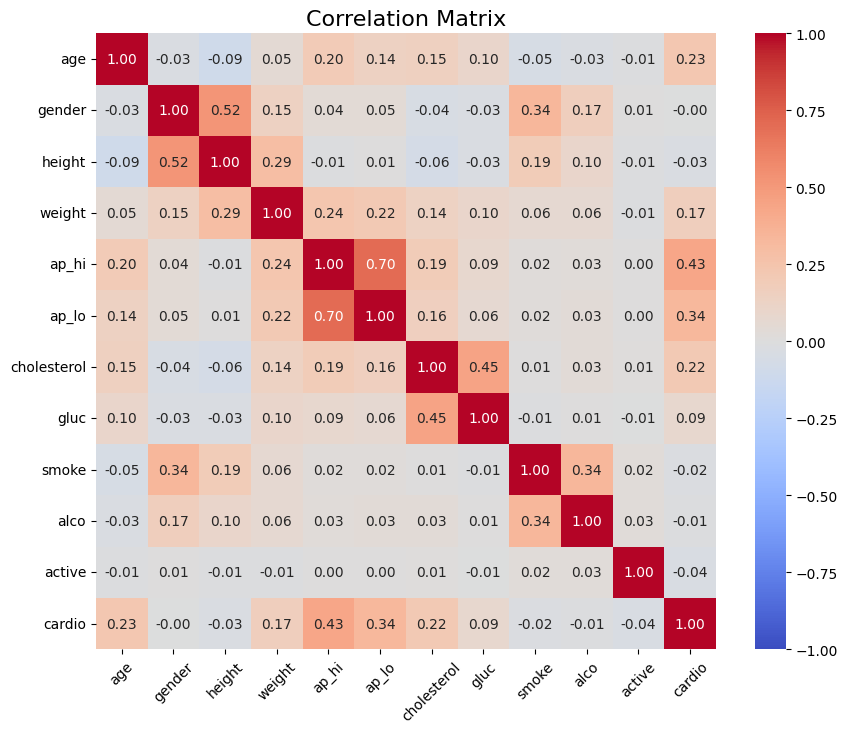

In [17]:
# Compute the correlation matrix
correlation = cleanedData.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(correlation, vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

## Machine Learning

### Initialization

In [18]:
#Initialize modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [19]:
# Extract Response and Predictors
y = pd.DataFrame(cleanedData["cardio"]) #Response
X = pd.DataFrame(cleanedData[[i for i in cleanedData][:-4]]) #Predictors
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,2,168,62.0,110,80,1,1
1,20228,1,156,85.0,140,90,3,1
2,18857,1,165,64.0,130,70,3,1
3,17623,2,169,82.0,150,100,1,1
5,21914,1,151,67.0,120,80,2,2


In [20]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2321698)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (47340, 1) (47340, 8)
Test Set  : (15781, 1) (15781, 8)


### Decision Tree

In [21]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=3,random_state=2321698)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=3, random_state=2321698)

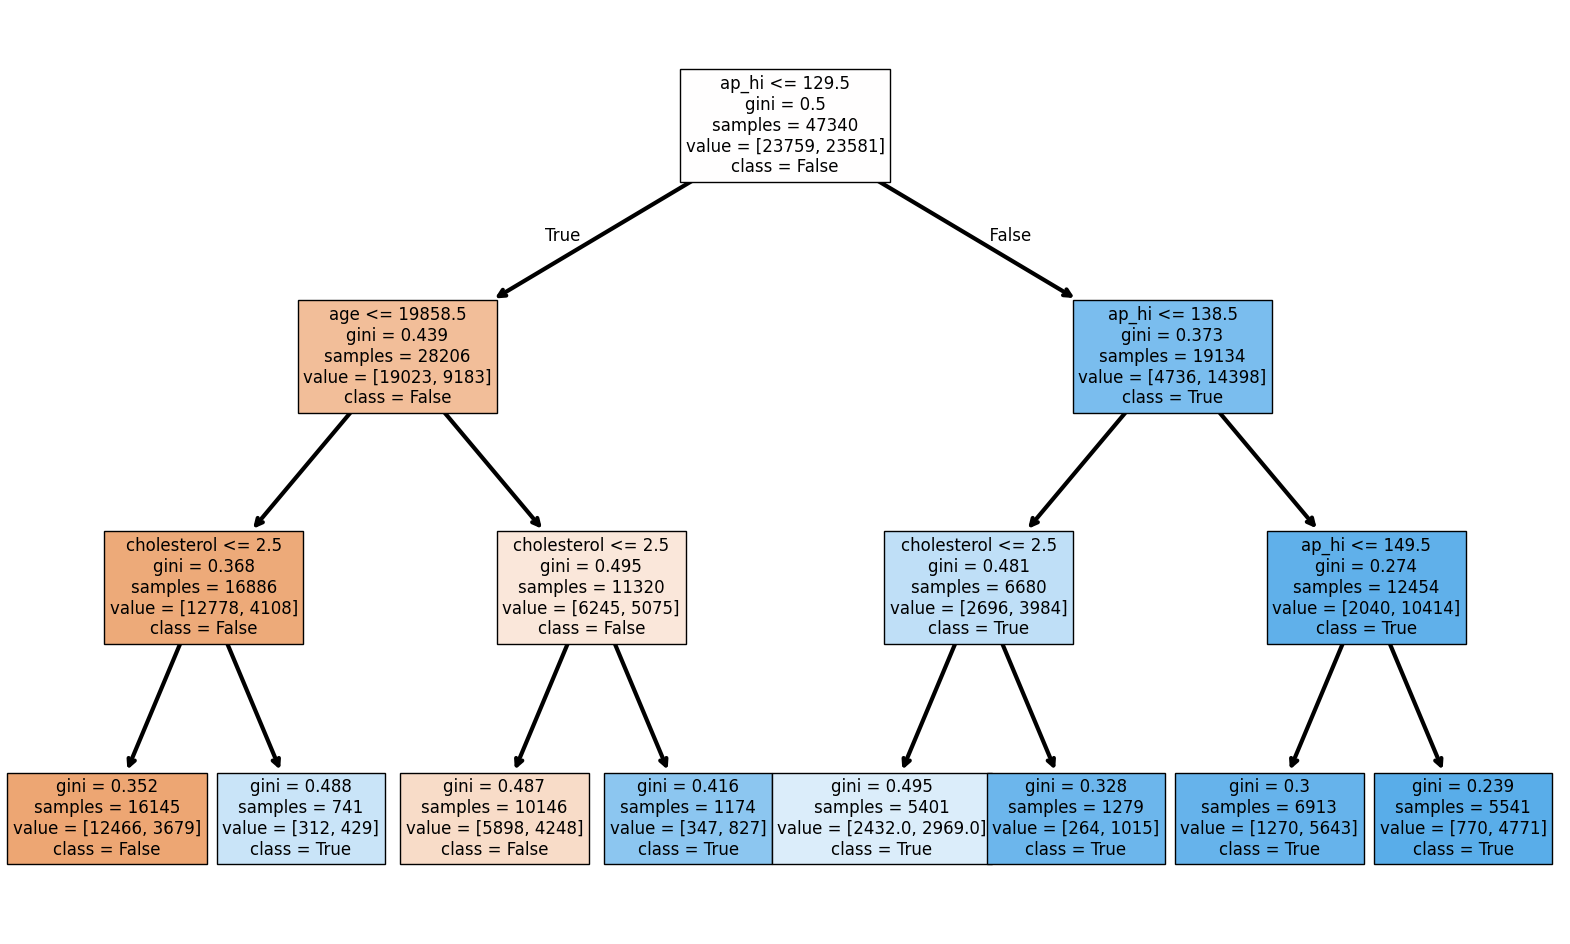

In [22]:
# Plot the trained Decision Tree
fig, ax = plt.subplots(figsize=(20, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True,
          fontsize=12)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7185889311364596

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.723084722134212

              Train Confusion Matrix                                             Test Confusion Matrix               


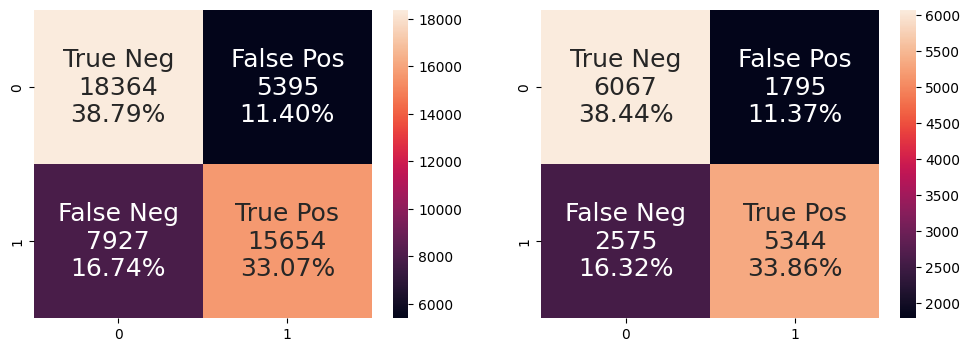

In [23]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

cf_matrix = confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot = labels, fmt="", annot_kws={"size": 18}, ax = axes[0])

cf_matrix = confusion_matrix(y_test, y_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot = labels, fmt="", annot_kws={"size": 18}, ax = axes[1])

print("Train Confusion Matrix".center(50)," "*15,"Test Confusion Matrix".center(50))

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Random Forest using Train Data
randomForest = RandomForestClassifier(max_depth=3,n_estimators=100,random_state=2321698)  # create the Random Forest object
randomForest.fit(X_train, y_train)                    # train the Random Forest model

/home/archxved/repos/IE0005/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, random_state=2321698)

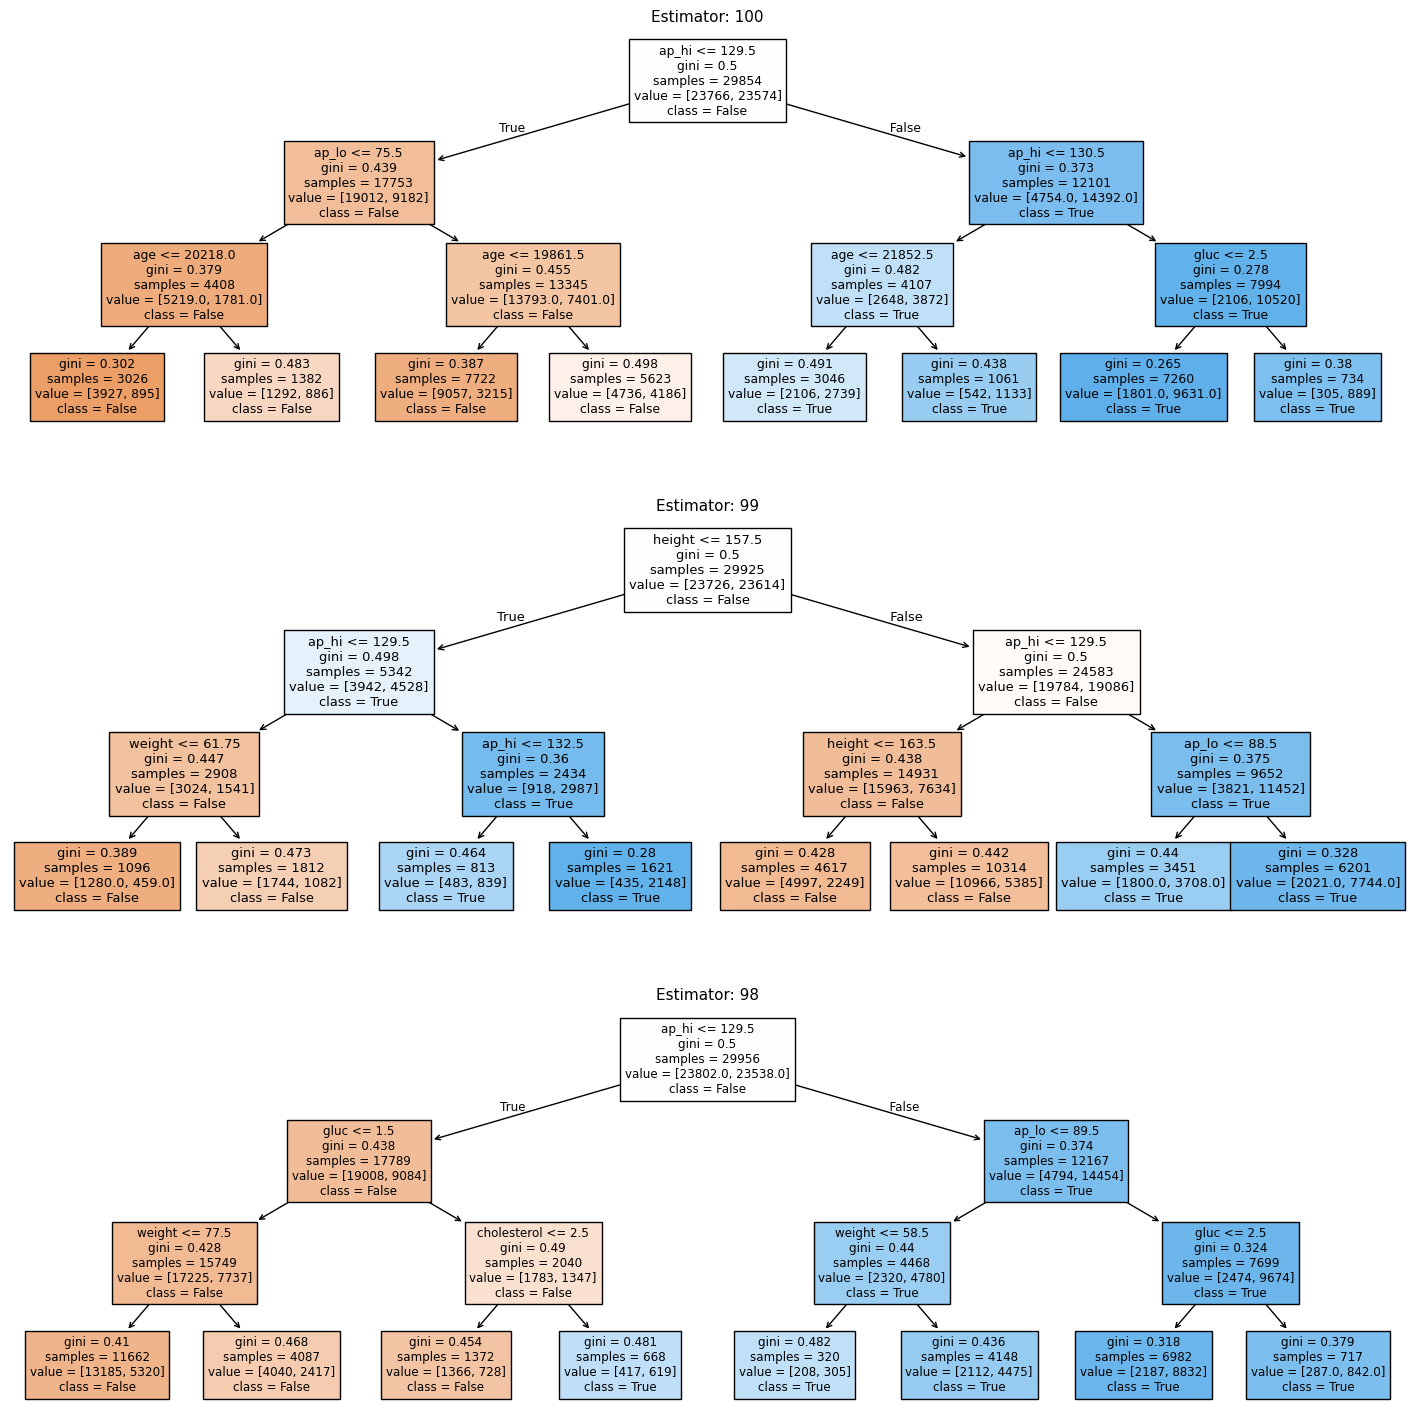

In [26]:
fig, axes = plt.subplots(3,1,figsize = (18,18))
for index in range(1, 4):
    plot_tree(randomForest.estimators_[0-index],
                   feature_names = X_train.columns.tolist(), 
                   class_names = [str(x) for x in dectree.classes_],
                   filled = True,
                   ax = axes[index-1])
    

    axes[index-1].set_title('Estimator: ' + str(100-index+1), fontsize = 11)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7187790452049008

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7251124770293391

              Train Confusion Matrix                                             Test Confusion Matrix               


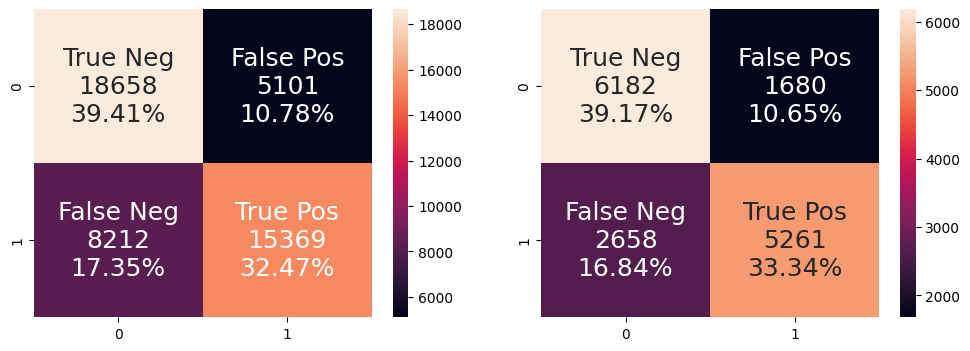

In [27]:
# Predict Response corresponding to Predictors
y_train_pred_RF = randomForest.predict(X_train)
y_test_pred_RF = randomForest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randomForest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randomForest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

cf_matrix = confusion_matrix(y_train, y_train_pred_RF)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot = labels, fmt="", annot_kws={"size": 18}, ax = axes[0])

cf_matrix = confusion_matrix(y_test, y_test_pred_RF)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot = labels, fmt="", annot_kws={"size": 18}, ax = axes[1])

print("Train Confusion Matrix".center(50)," "*15,"Test Confusion Matrix".center(50))

### Histogram-Based Gradient Boosting Decision Tree (HGBT) 
from https://scikit-learn.org/1.5/modules/ensemble.html#histogram-based-gradient-boosting

In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [29]:
# HGBT using Train Data
hgbctree = HistGradientBoostingClassifier(max_depth=3,early_stopping=True,random_state=2321698)  # create the HGBT object
hgbctree.fit(X_train, y_train)                    # train the HGBT model

/home/archxved/repos/IE0005/.venv/lib/python3.10/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:400: FutureWarning: The categorical_features parameter will change to 'from_dtype' in v1.6. The 'from_dtype' option automatically treats categorical dtypes in a DataFrame as categorical features.
  warnings.warn(
/home/archxved/repos/IE0005/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(early_stopping=True, max_depth=3,
                               random_state=2321698)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7306083650190114

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7325264558646474

              Train Confusion Matrix                                             Test Confusion Matrix               


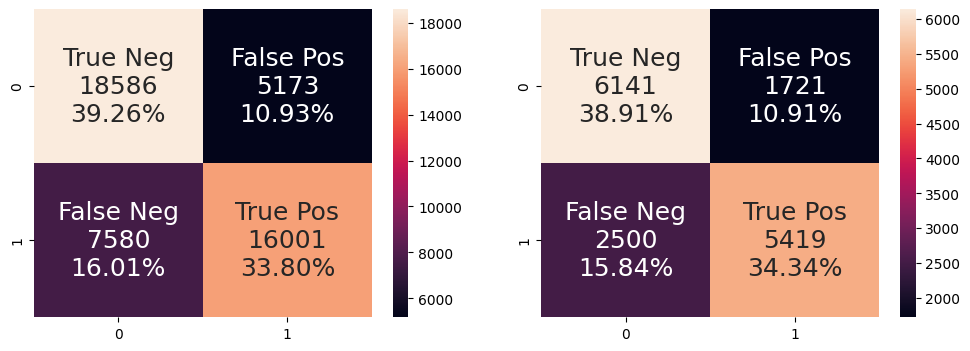

In [30]:
# Predict Response corresponding to Predictors
y_train_pred_hgbc = hgbctree.predict(X_train)
y_test_pred_hgbc = hgbctree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", hgbctree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", hgbctree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

cf_matrix = confusion_matrix(y_train, y_train_pred_hgbc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot = labels, fmt="", annot_kws={"size": 18}, ax = axes[0])

cf_matrix = confusion_matrix(y_test, y_test_pred_hgbc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot = labels, fmt="", annot_kws={"size": 18}, ax = axes[1])

print("Train Confusion Matrix".center(50)," "*15,"Test Confusion Matrix".center(50))